In [22]:
from __future__ import print_function, division #, absolute_import
from IPython.display import display
import math, cmath
import numpy as np
import quaternion
import numba as nb
import astropy.constants
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"
from mpl_toolkits.mplot3d import Axes3D

# Waveforms

# Center-of-mass histograms

Logarithmic horizontal axis showing values of

  * Offsets
  * Velocities
  * Displacement at merger

# Boosted grid

In [145]:
β = 0.5
α = math.atanh(β)
γ = 1 / math.sqrt(1-β**2)
v = np.array([1, 0, 1])
vhat = v / np.linalg.norm(v)

def Θ(Θp):
    return 2 * math.atan(γ * (1-β) * math.tan(Θp/2))

def R_B(θp, ϕp):
    R = quaternion.from_spherical_coords(θp, ϕp)
    r = (R * quaternion.z * R.inverse()).vec
    Θp = math.acos(np.dot(r, vhat))
    a = -np.cross(r, vhat)
    tmp = np.linalg.norm(a)
    if tmp < 1e-12:
        return quaternion.one
    a = a / tmp
    return ((Θ(Θp) - Θp) * np.quaternion(0, *a) / 2).exp()

n_phi = 17
n_theta = 17
thetaprm_phiprm = np.array([[thetaprm, phiprm]
                             for phiprm in np.linspace(0.0, 2*np.pi, num=n_phi, endpoint=False)
                            for thetaprm in np.linspace(0.0, np.pi, num=n_theta, endpoint=True)])

R_prm = np.array([quaternion.from_spherical_coords(*tp) for tp in thetaprm_phiprm])
r_prm = np.array([(r * quaternion.z * r.inverse()).vec for r in R_prm])
t_prm = np.array([(r * quaternion.x * r.inverse()).vec for r in R_prm])
p_prm = np.array([(r * quaternion.y * r.inverse()).vec for r in R_prm])

R = np.array([R_B(*tp)*quaternion.from_spherical_coords(*tp) for tp in thetaprm_phiprm])
r = np.array([(r * quaternion.z * r.inverse()).vec for r in R])
t = np.array([(r * quaternion.x * r.inverse()).vec for r in R])
p = np.array([(r * quaternion.y * r.inverse()).vec for r in R])

Rr = np.array([np.quaternion(0, 0.1, 0.2, 0.3).exp()*quaternion.from_spherical_coords(*tp) for tp in thetaprm_phiprm])
rr = np.array([(r * quaternion.z * r.inverse()).vec for r in Rr])
tr = np.array([(r * quaternion.x * r.inverse()).vec for r in Rr])
pr = np.array([(r * quaternion.y * r.inverse()).vec for r in Rr])

phase_differences = np.array([math.acos(np.dot([-math.sin(math.atan2(ri[1], ri[0])), math.cos(math.atan2(ri[1], ri[0])), 0], ti))
                              for ri,ti in zip(r,t)])
phase_differencesr = np.array([math.acos(np.dot([-math.sin(math.atan2(ri[1], ri[0])), math.cos(math.atan2(ri[1], ri[0])), 0], ti))
                               for ri,ti in zip(rr,tr)])

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `OriginalGrid.pdf'.
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `DeboostedGrid.pdf'.
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `DerotatedGrid.pdf'.


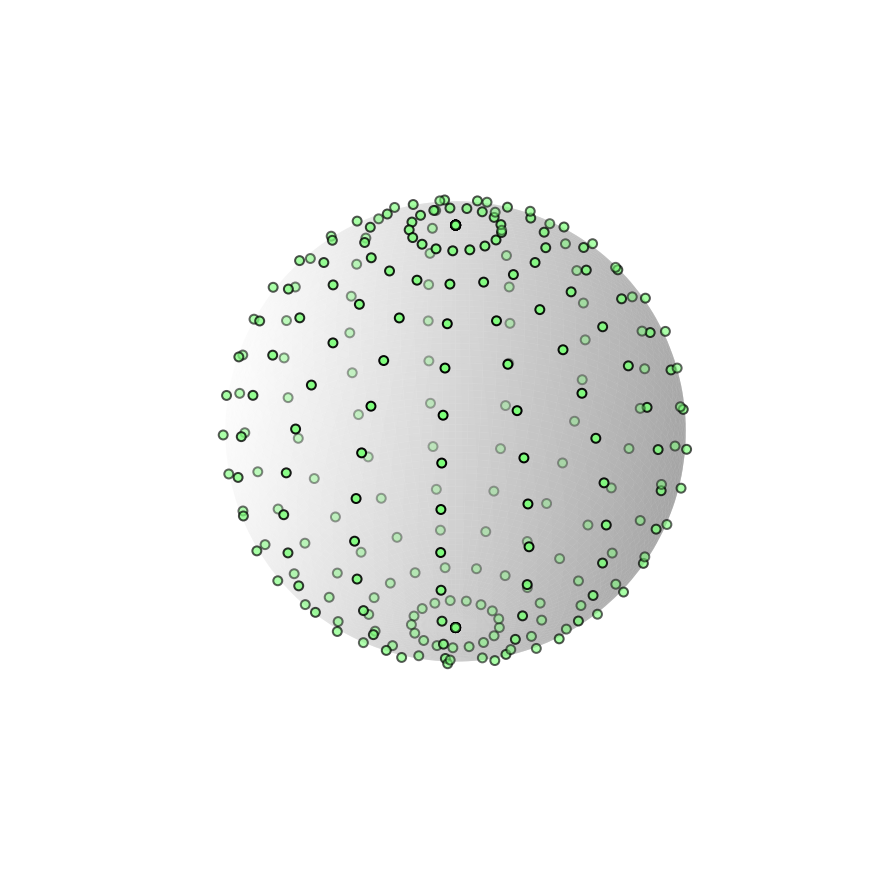

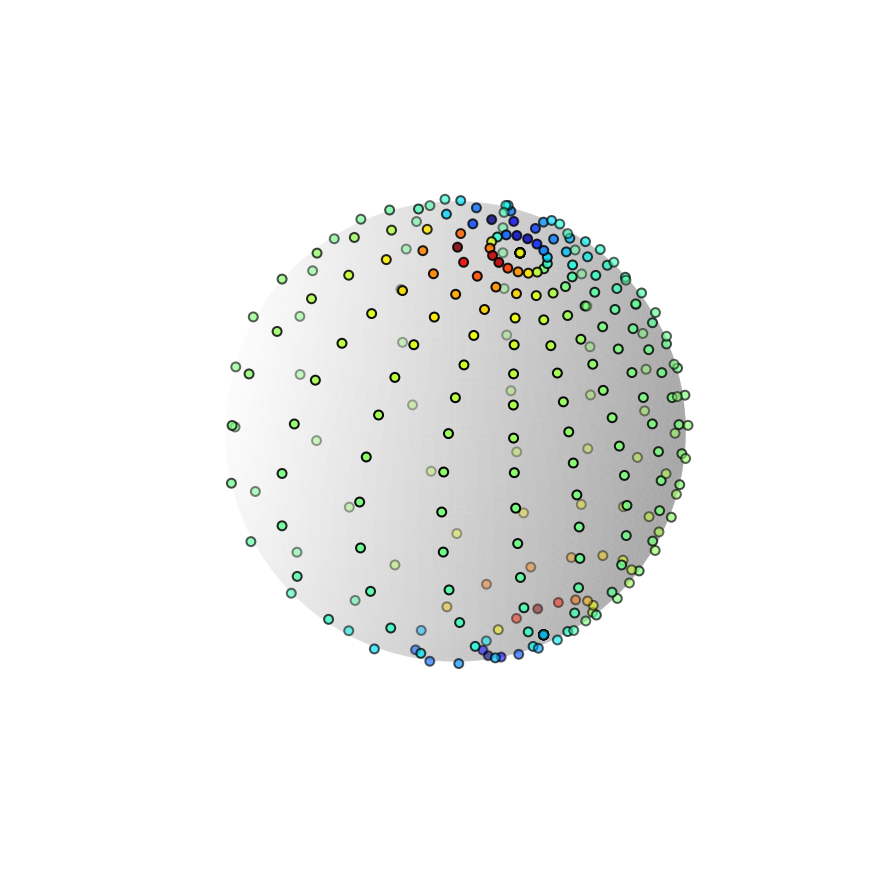

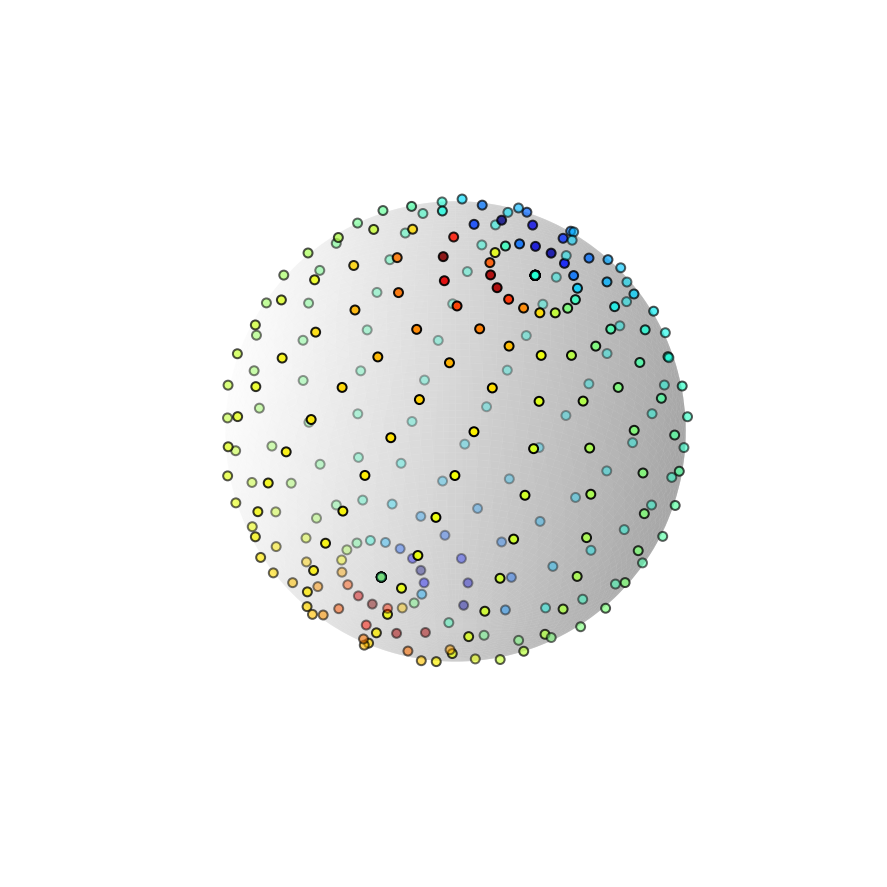

In [147]:
rm=0.99
phi = np.linspace(0, 2 * np.pi, 100)
theta = np.linspace(0, np.pi, 100)
xm = rm * np.outer(np.cos(phi), np.sin(theta))
ym = rm * np.outer(np.sin(phi), np.sin(theta))
zm = rm * np.outer(np.ones(np.size(phi)), np.cos(theta))

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xm, ym, zm, rstride=1, cstride=1, linewidth=0, color=(1, 1, 1, 0.5));
ax.scatter(r_prm[:,0],r_prm[:,1],r_prm[:,2],c=mpl.cm.jet(0.5));
# ax.plot_wireframe(r_prm[:,0],r_prm[:,1],r_prm[:,2]);
#ax.set_title('Grid as seen in boosted frame');
ax.set_xlim(-1,1);
ax.set_ylim(-1,1);
ax.set_zlim(-1,1);
ax._axis3don = False;
plt.tight_layout(pad=0.1);
plt.savefig('OriginalGrid.pdf', transparent=True);
! pdfcrop OriginalGrid.pdf OriginalGrid.pdf

# Now show that grid "de-boosted" into the original frame
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xm, ym, zm, rstride=1, cstride=1, linewidth=0, color=(1, 1, 1, 0.5));
ax.scatter(r[:,0],r[:,1],r[:,2], c=phase_differences);
# ax.plot_wireframe(r[:,0],r[:,1],r[:,2]);
#ax.set_title('Grid in original frame that will become equi-angular in boosted frame');
ax.set_xlim(-1,1);
ax.set_ylim(-1,1);
ax.set_zlim(-1,1);
ax._axis3don = False;
plt.tight_layout(pad=0.1);
plt.savefig('DeboostedGrid.pdf', transparent=True);
! pdfcrop DeboostedGrid.pdf DeboostedGrid.pdf

# Now show that grid "de-rotated" into the original frame
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xm, ym, zm, rstride=1, cstride=1, linewidth=0, color=(1, 1, 1, 0.5));
ax.scatter(rr[:,0],rr[:,1],rr[:,2], c=phase_differencesr);
# ax.plot_wireframe(r[:,0],r[:,1],r[:,2]);
#ax.set_title('Grid in original frame that will become equi-angular in boosted frame');
ax.set_xlim(-1,1);
ax.set_ylim(-1,1);
ax.set_zlim(-1,1);
ax._axis3don = False;
plt.tight_layout(pad=0.1);
plt.savefig('DerotatedGrid.pdf', transparent=True);
! pdfcrop DerotatedGrid.pdf DerotatedGrid.pdf

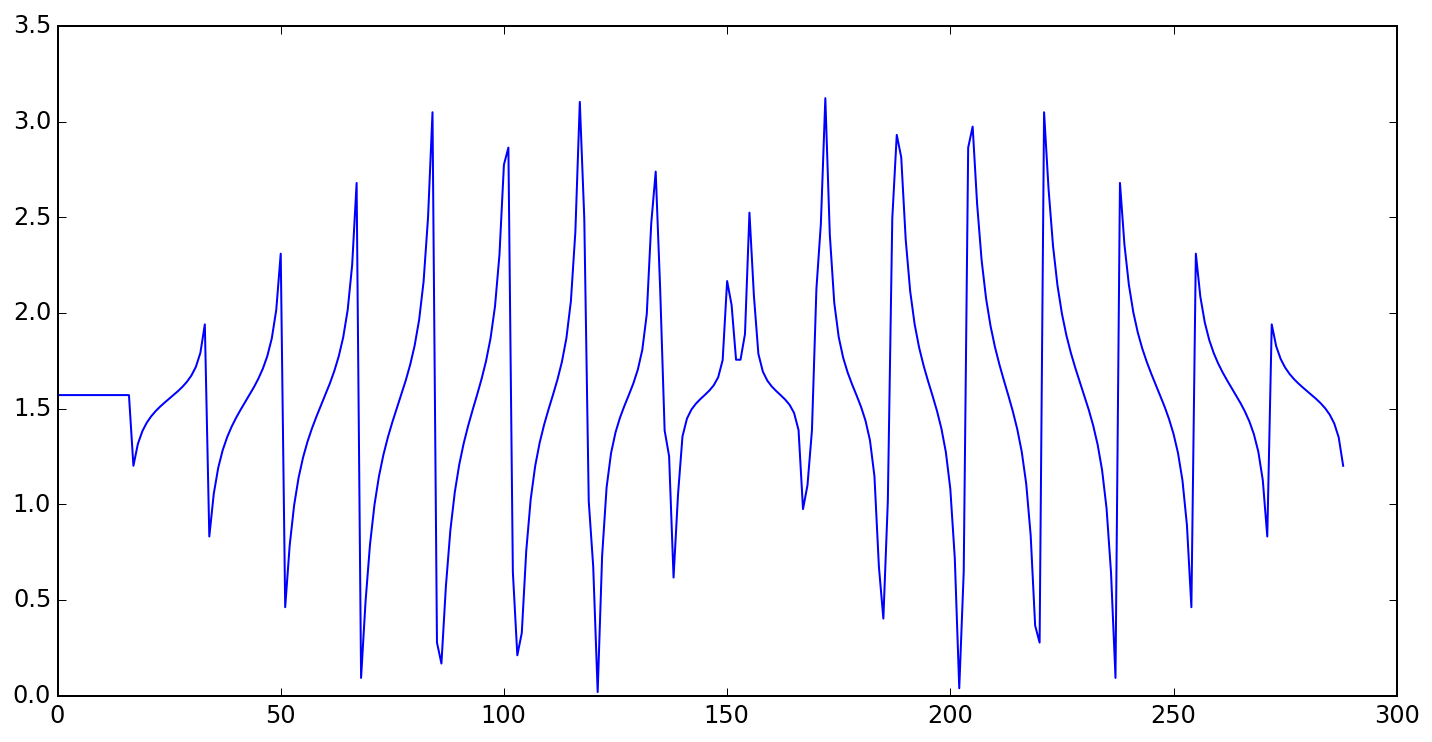

In [148]:
plt.plot(phase_differences)